In [53]:
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Define function for text cleaning
def clean_text(text):
    # Remove mentions, hashtags, and URLs
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^\w\s]',' ',text)
    text = re.sub(r'http\S+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize text and perform POS tagging
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    
    # Remove stopwords and exclude nouns and pronouns
    words = [word for word, tag in pos_tags if word not in stopwords.words('english') and tag not in ['PRP', 'PRP$']]
    
    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words into a cleaned sentence
    cleaned_text = ' '.join(words)
    
    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Define a function to generate word cloud from a given text corpus
def generate_wordcloud(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Generate a dictionary of word frequency counts
    word_freq = {}
    for word in words:
        if word not in word_freq:
            word_freq[word] = 1
        else:
            word_freq[word] += 1
            
    # Generate a word cloud from the word frequency dictionary
    wc = WordCloud(width=800, height=400, background_color='white', max_words=50).generate_from_frequencies(word_freq)
    
    # Plot the word cloud
    plt.figure(figsize=(12, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_keywords(corpus, n=5):
    # Create a TfidfVectorizer object with custom stop words and max_df parameter
    vectorizer = TfidfVectorizer(stop_words='english', max_df=0.85)

    # Fit and transform the corpus using TfidfVectorizer
    tfidf_matrix = vectorizer.fit_transform(corpus)

    # Get feature names (words) from TfidfVectorizer object
    feature_names = vectorizer.get_feature_names()

    # Initialize list to store top n most important words for each document
    top_words_list = []

    # Loop over each document in the corpus
    for i, doc in enumerate(corpus):
        # Get indices of top n most important words for current document
        top_indices = tfidf_matrix[i].toarray().argsort()[-n:][::-1]
        # Get top n most important words for current document
        top_words = [feature_names[idx] for idx in top_indices]
        # Append list of top n most important words to output list
        top_words_list.append(top_words)

    return top_words_list

In [39]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/term2_bigdata_project/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import seaborn as sns
sns.set_style("darkgrid")

In [41]:
import pandas as pd
df=pd.read_csv('consolidated.csv')

In [42]:
df['Text']=df['Text'].replace('[removed]', None)

In [43]:
df_=df[['Text', 'Subreddit']].dropna().drop_duplicates()

<AxesSubplot:>

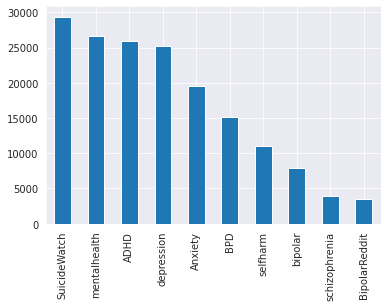

In [44]:
# top 10 subreddit in our dataset
df_.Subreddit.value_counts()[:10].plot(kind='bar')

In [45]:
df_.Subreddit.value_counts()

SuicideWatch              29389
mentalhealth              26667
ADHD                      25926
depression                25170
Anxiety                   19513
BPD                       15142
selfharm                  10955
bipolar                    7930
schizophrenia              3993
BipolarReddit              3497
ptsd                       2944
sad                        2609
mentalillness              2552
BipolarSOs                 1247
u_Tight-Anxiety-5544         17
u_New-Anxiety-2415           12
u_Informal-Anxiety-820        3
u_jas-is-rad-and-sad          1
u_Anti-sad                    1
u_Content-Anxiety-3017        1
u_Medical-Anxiety-2731        1
u_Low-Anxiety-8731            1
u_No-Anxiety-4113             1
u_Sensitive-Anxiety-10        1
u_Relevant-Anxiety-849        1
u_Mediocre-Anxiety-197        1
Name: Subreddit, dtype: int64

In [ ]:
texts=df[['Text', 'Subreddit']].replace('[removed]', None).drop_duplicates().dropna()
texts_filter=texts[texts['Subreddit']=='SuicideWatch']
texts_filter['clean_text']=texts_filter['Text'].apply(clean_text)

In [ ]:
imp_words=extract_keywords(texts_filter['clean_text'], n=1000)

In [ ]:
def filter_important_words(text):
  words = word_tokenize(text)
  words = [word for word in words if word in imp_words]
  filter_text = ' '.join(words)
  return filter_text

texts_filter['imp_text']=texts_filter['clean_text'].apply(filter_important_words)

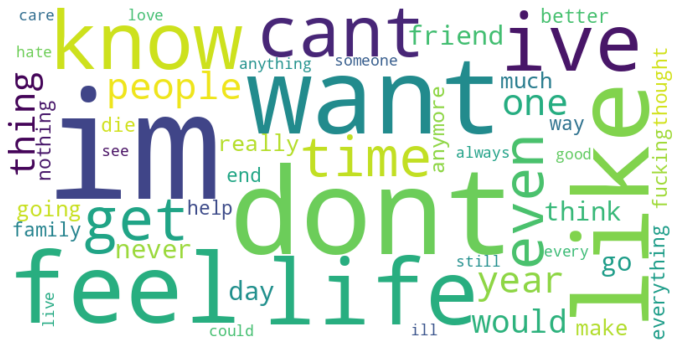

In [34]:
generate_wordcloud(" ".join(texts[texts['Subreddit']=='SuicideWatch']['Text'].apply(clean_text)))

In [ ]:

subreddits=df_.groupby('Subreddit').apply(lambda grp: " ".join(grp['Text'].apply(clean_text)))

,Text,Subreddit
146080,I got fired today and I am a loser. I hope I d...,SuicideWatch
146082,"She’s just an absolute gem, an angel disguised...",SuicideWatch
146083,I updated my suicide note on Tuesday. I'm fina...,SuicideWatch
146084,Before i start i want to adress some thing wic...,SuicideWatch
146085,"It's hard to just pull that trigger, to get it...",SuicideWatch
...,...,...
186304,"I just feel empty, too tired to do anything, I...",SuicideWatch
186307,I wouldn’t be here at all if it weren’t for my...,SuicideWatch
186308,I am dealing with chronic pain that make it ha...,SuicideWatch
186309,My mom just told me she regrets having me and ...,SuicideWatch
